In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [61]:
subrun = 1049

fileName = "./data/"+str(subrun)+".txt"
fileName = "./data/output_1000.txt"

In [113]:
previousEntry = -1
colliCounter = 0
with open(fileName, "r") as ins:
    array = []
    for line in ins:
        if("Time(ns)" in line):
            ding = line.strip().split()
            #print(line)
            #print(ding)
            entry = int(ding[29])
            if(previousEntry < entry):
                colliCounter = 0
                previousEntry = entry
            dong = [float(ding[2]), float(ding[5]), float(ding[8]), float(ding[11]),
                    float(ding[14]), float(ding[17]) , float(ding[20]), float(ding[23]), 
                    float(ding[26]), entry, ding[32] ]
            if('olli' in ding[32]):
                collimator = int(ding[32].split('Collimator')[1])
                colliCounter += 1
            else:
                collimator = np.nan
            dong.append(collimator)
            dong.append(colliCounter)
            array.append(dong)

In [115]:
print(dong)

[2207.897665688055, 7270.06005859375, -2872.120275723358, 483.5316592687931, 6678.67490650155, -0.0, -0.0, -0.0, 0.0, 1000, 'RingYokeTop', nan, 1]


In [116]:
dffull = pandas.DataFrame(array, columns = [ 'time', 'R', 'x', 'y', 'z', 'px', 'py', 'pz', 'E', 
                                            'entry', 'Location', 'collimator', 'collimatorCollisions'])

In [142]:
entry = 12
df = dffull
#df = dffull.loc[dffull['Location'] == 'xtal[00]']
#df = dffull[dffull['Location'].str.contains('xtal')]
#df = dffull[dffull['entry'] == entry]
#df = dffull[dffull['Location'].str.contains('olli')].loc[dffull['collimatorCollisions'] > 1]
df = dffull[dffull['Location'].str.contains('alori')]

In [143]:
df.head()

,time,R,x,y,z,px,py,pz,E,entry,Location,collimator,collimatorCollisions
754,104.065298,7007.899902,6653.939810,-1.287495,-2199.032613,897.926573,2.998451,2874.479952,3011.464115,2,CalorimeterNumber[22],NaN,1
1434,104.537234,7009.218262,6698.202394,-2.088734,-2064.758725,919.988088,-29.063946,2693.865103,2846.775718,2,CalorimeterNumber[22],NaN,1
1454,116.341517,7008.182617,6862.270692,-51.527146,1422.626972,-631.488241,-38.835641,2721.027891,2793.613858,2,CalorimeterNumber[00],NaN,1
2132,116.812907,7004.683105,6828.815377,-54.956451,1559.764412,-641.640776,-94.324422,2482.209475,2565.533835,2,CalorimeterNumber[00],NaN,1
2541,134.919931,6986.941895,3835.885910,41.454604,5839.805961,-2516.111297,0.800823,1550.330561,2955.391945,3,CalorimeterNumber[03],NaN,2


In [134]:
df.describe()

,time,R,x,y,z,px,py,pz,E,entry,collimator,collimatorCollisions
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,115.567121,7067.035144,2688.021566,-0.991684,-5137.365934,2235.418652,0.050546,1162.556498,3067.077562,490.309549,7.439664,2.563484
std,73.735257,5.759331,2309.303723,12.440948,3318.025708,1435.639329,13.093264,1000.863480,37.633522,290.794839,1.650306,0.846650
min,86.952836,7062.329102,-3562.860429,-45.289490,-6138.530199,-2669.161550,-47.831600,-1582.079081,2502.635254,3.000000,2.000000,2.000000
25%,86.991809,7065.108398,3540.294561,-0.800450,-6113.518755,2652.728657,-8.077126,1522.136660,3067.410898,218.000000,8.000000,2.000000
50%,86.992598,7065.120605,3544.190594,-0.788703,-6111.848552,2662.815706,-0.391049,1533.636621,3075.982159,497.000000,8.000000,2.000000
75%,86.992599,7065.139648,3544.199817,-0.777810,-6111.834410,2668.306298,8.379435,1541.664825,3078.634137,749.000000,8.000000,3.000000
max,680.541393,7101.498535,3553.973585,47.094585,6148.078621,2705.076642,52.842863,1620.465037,3090.349828,998.000000,8.000000,7.000000


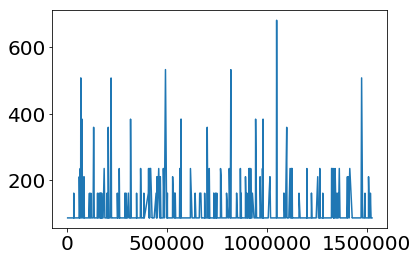

In [135]:
plt.plot(df['time'])
plt.show()

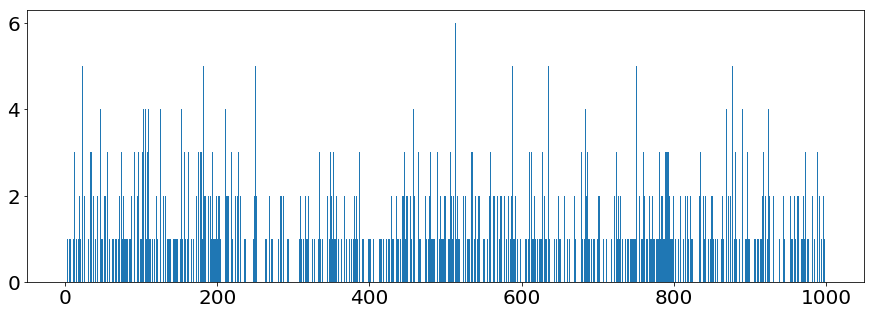

In [136]:
fig,ax = plt.subplots(figsize=(15,5))
plt.hist(df['entry'], bins=1000, range=(0,1000))
plt.show()

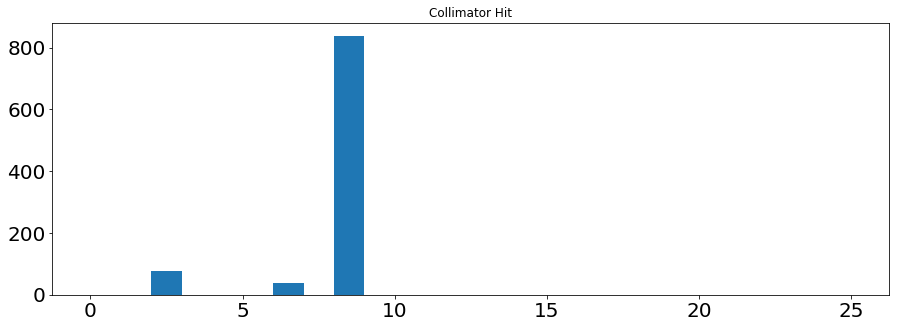

In [137]:
fig,ax = plt.subplots(figsize=(15,5))
plt.hist(df['collimator'], bins=(25), range=(0,25))
plt.title("Collimator Hit")
plt.show()

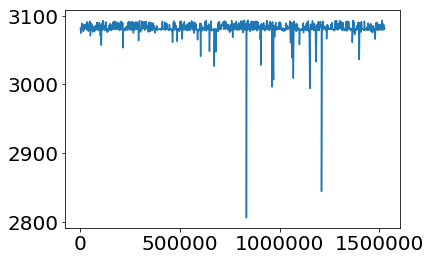

In [128]:
plt.plot(df['E'])
plt.show()

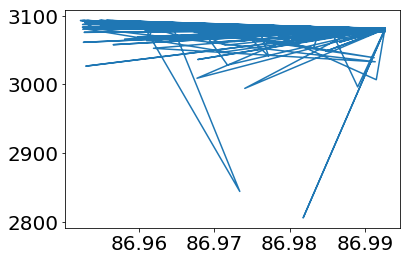

In [129]:
plt.plot(df['time'],df['E'])
plt.show()

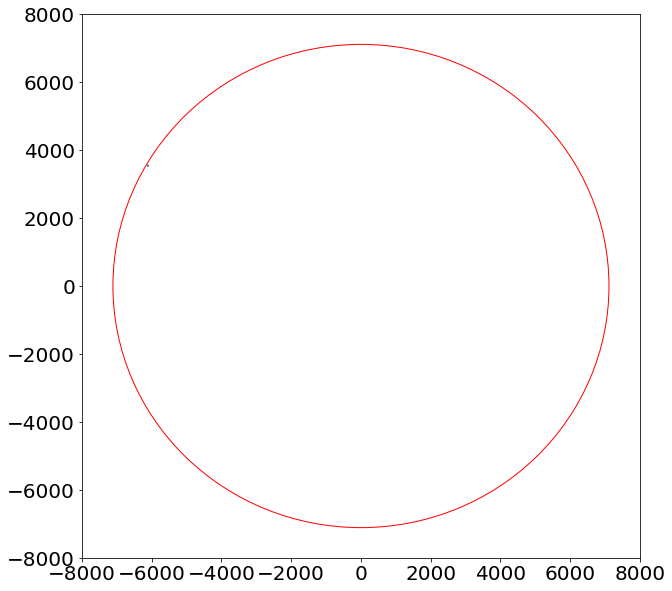

In [130]:
noint()
fig,ax = plt.subplots(figsize=(10,10))

plt.plot(df["z"],df['x'])

circle2 = plt.Circle((0,0), 7112, color='r', fill=False)
ax.add_artist(circle2)


plt.xlim(-8000,8000)
plt.ylim(-8000,8000)

plt.show()

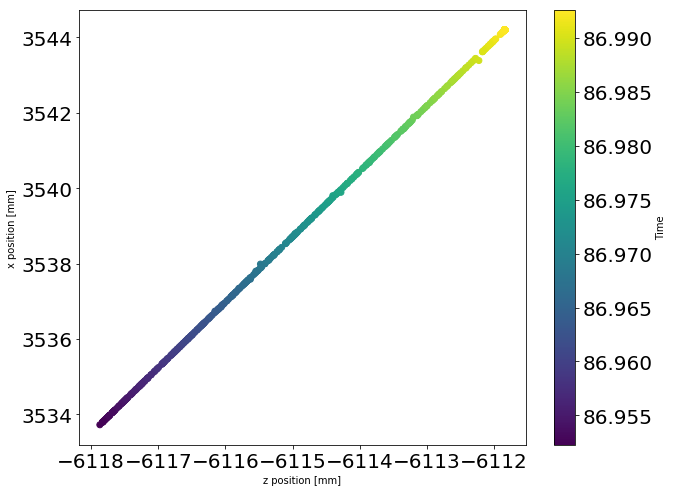

In [131]:
fig, ax = plt.subplots(figsize=(10,8))
#plt.plot(df["z"],df['x'],':',color='grey')

circle2 = plt.Circle((0,0), 7112, color='r', fill=False)
ax.add_artist(circle2)

sc = ax.scatter(df["z"],df['x'], c=df['time']) #,norm=matplotlib.colors.LogNorm())
plt.colorbar(sc,label='Time')

plt.xlabel("z position [mm]")
plt.ylabel("x position [mm]")

plt.show()

In [85]:
img = plt.imread("../data/ring.png")
#img = ndimage.rotate(imgOriginal, 12.5)

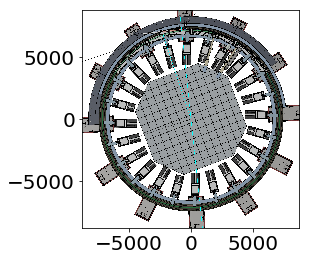

In [86]:
from matplotlib import transforms

fig = plt.figure()
ax = fig.add_subplot(111)

tr = transforms.Affine2D().rotate_deg(18.35)

rad = 8750
ax.imshow(img, transform=tr + ax.transData, extent=[-1*rad, rad,-1*rad, rad])
plt.show()

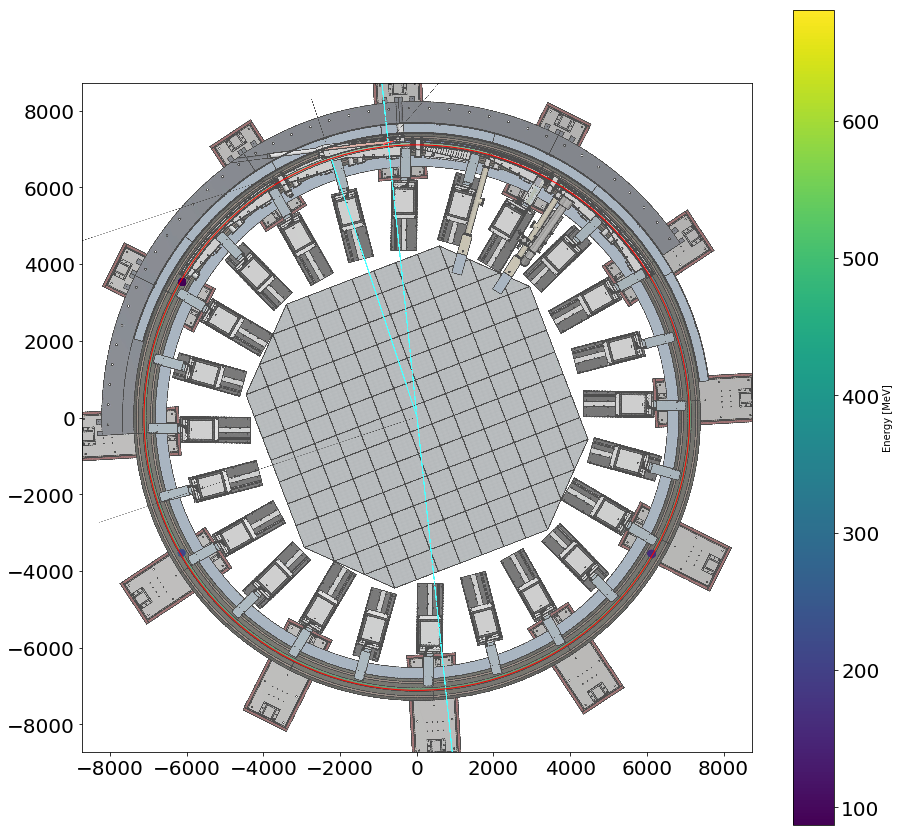

In [98]:
fig, ax = plt.subplots(figsize=(15,15))
x = range(300)
rad = 8730
alpha = 0.7
ax.imshow(img, extent=[-1*rad, rad,-1*rad, rad], transform=tr + ax.transData, alpha=alpha)

circle2 = plt.Circle((0,0), 7112, color='r', fill=False)
ax.add_artist(circle2)

#plt.plot(df["z"],df['x'],':',color='grey')

sc = ax.scatter(df["z"],df['x'], c=df['time']) #,norm=matplotlib.colors.LogNorm())
plt.colorbar(sc,label='Energy [MeV]')

#plt.plot([0,0],[-8000,8000],'b')
#plt.plot([-8000,8000],[0,0],'b')

plt.show()

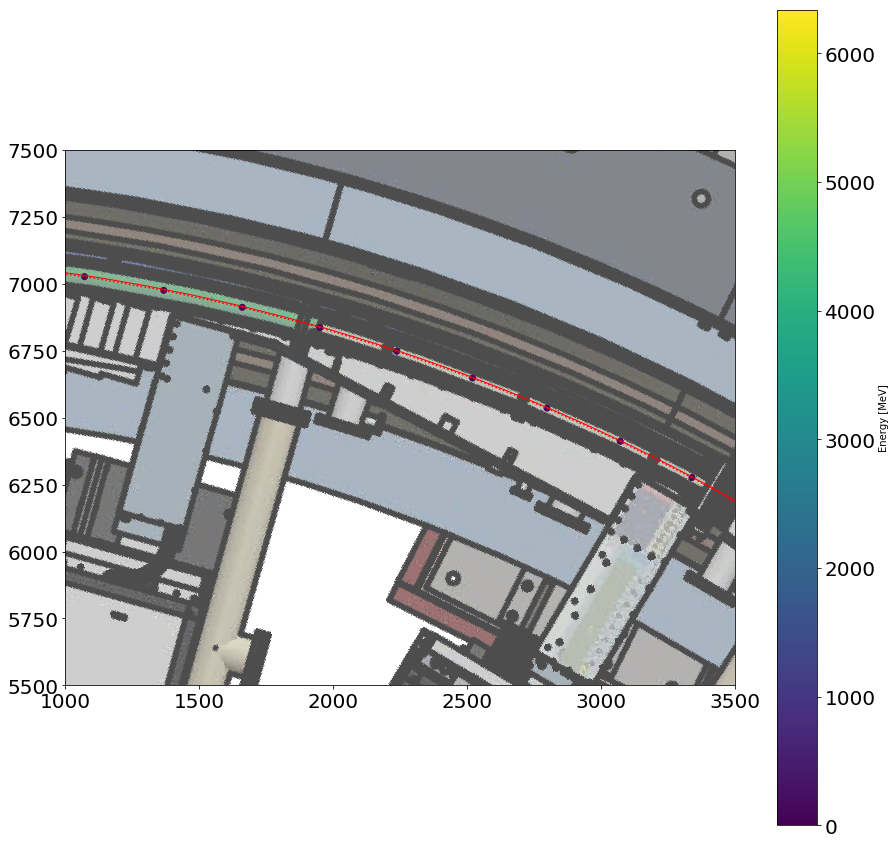

In [88]:
fig, ax = plt.subplots(figsize=(15,15))
plt.plot(df["z"],df['x'],':',color='r')

ax.imshow(img, extent=[-1*rad, rad,-1*rad, rad], transform=tr + ax.transData,alpha=alpha)

circle2 = plt.Circle((0,0), 7112, color='r', fill=False)
ax.add_artist(circle2)


sc = ax.scatter(df["z"],df['x'], c=df['time']) #,norm=matplotlib.colors.LogNorm())
plt.colorbar(sc,label='Energy [MeV]')

plt.xlim(1000,3500)
plt.ylim(5500,7500)

#plt.plot([0,0],[-8000,8000],'b')
#plt.plot([-8000,8000],[0,0],'b')

plt.show()